In [1]:
import matplotlib.pyplot as plt
import os, sys
import numpy as np
from utils import read_data

In [2]:
params = {
    "set1": {
        "mode": "TRAIN",
        "folderName": "2024-01-05-09-50-00",
    }
}

param = "set1"

In [3]:
mode = params[param]["mode"]
folderName = params[param]["folderName"]

In [4]:
if mode == "TRAIN":
    sourceFolder = "o2_base_train"
elif mode == "TEST":
    sourceFolder = "o2_base_test"
else:
    raise Exception("Unknown mode.")

In [5]:
cwd = sys.path[0]
outputFolderPath = os.path.join(cwd, sourceFolder)
folderPath = os.path.join(outputFolderPath, folderName)
data_pickle, data_json = read_data(folderPath)
data = data_pickle["data"]
tArray = data_pickle["tArray"]
nx = data_json["s1"]["n"]
dx = data_json["s1"]["dx"]
L = data_json["s1"]["L"]
tStart = data_json["s1"]["tStart"]
tEnd = data_json["s1"]["tEnd"]
dt = data_json["s1"]["dt"]
mTotal = data_json["s1"]["mTotal"]

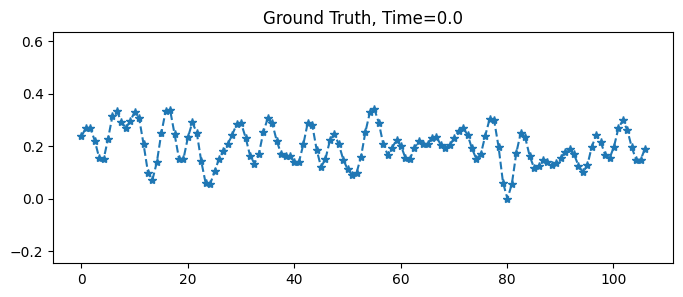

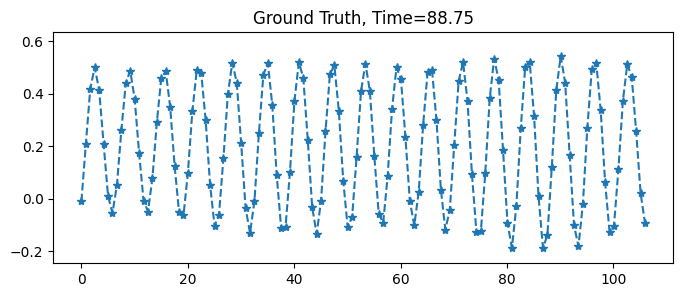

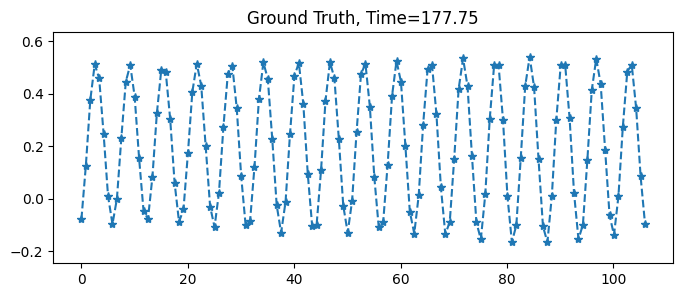

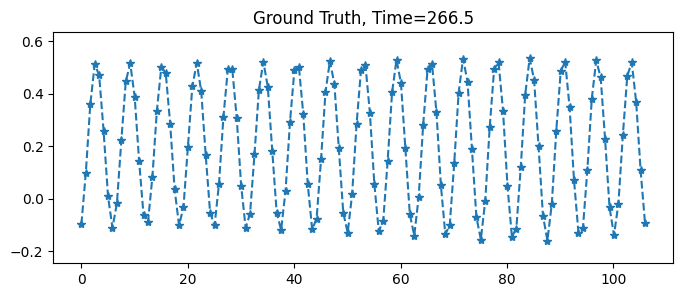

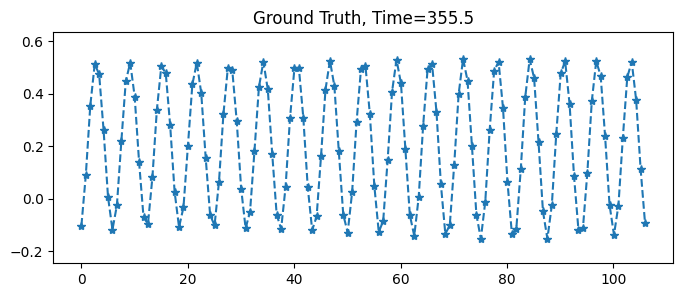

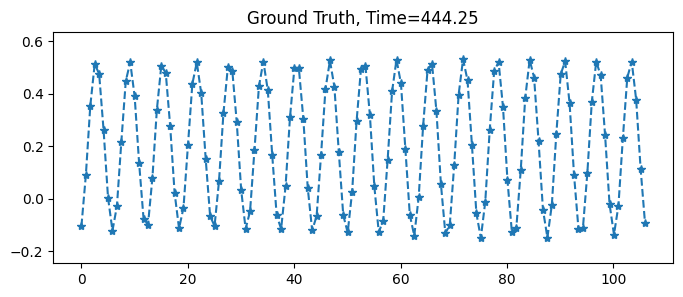

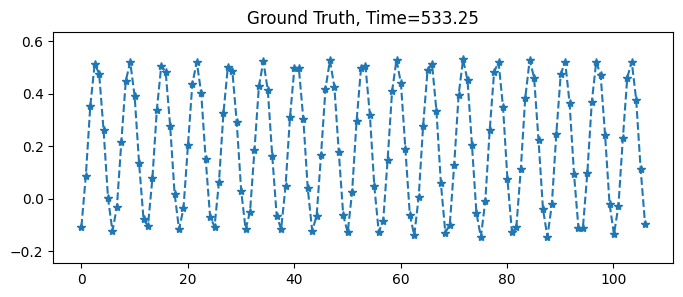

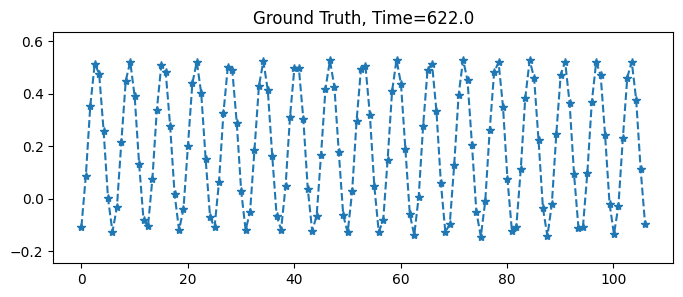

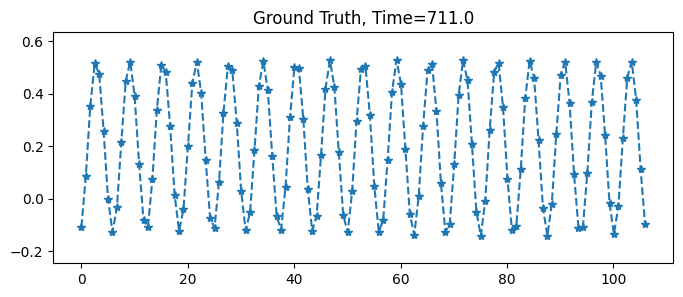

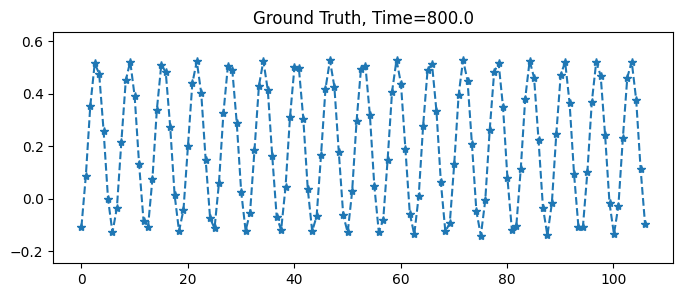

In [6]:
filenamePrefix = "profile"
nFig = 10
minV = data[-1, :].min()
maxV = data[-1, :].max()
minV = minV - abs(maxV) * 0.2
maxV = maxV + abs(maxV) * 0.2


idxTSample = np.floor(np.linspace(0, tArray.shape[0] - 1, nFig)).astype(int)
xp = np.arange(0, L, dx)
for t in idxTSample:
    tTime = tArray[t]
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.plot(xp, data[t, :], "*--")
    ax.set_title(f"Ground Truth, Time={tTime}")
    ax.set_ylim([minV, maxV])
    # plt.grid(True)
